# Random Forest

#Data Frame disponível em: https://drive.google.com/file/d/1jEBo-QkvwuUgbNO6lt6Wnx_F26_DCwVG/view 

#Exercício Reprodução do canal Data Viking

In [1]:
#Biblioteca para modelagem dos dados
import pandas as pd

#Biblioteca para recursos matemáticos
import numpy as np

#Biblioteca para plotagem dos dados
import seaborn as sns
import matplotlib.pyplot as plt

#Biblioteca  / função para ignorar avisos
from warnings import filterwarnings

In [3]:
#Plan1 - Base dos dados
#Plan2 - Novas entradas para predição

df=pd.read_excel('BaseDados_FlorestaDeDecisão.xlsx', 'Plan1')

# EDA - Entendimento dos dados

In [4]:
#Serviço 1 = Não usou o seguro
#Serviço 2 = Serviço
#Serviço 3 = Furto


#Lendo as 5 primeiras linhas do df
df.head()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
0,1,69,3930,19005,3
1,2,27,3336,19027,1
2,3,49,3936,19001,3
3,4,60,157,19009,1
4,5,51,3998,19050,2


In [5]:
#Verificando o formato dos dados por coluna

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id Cliente    500 non-null    int64
 1   Idade         500 non-null    int64
 2   Preço Seguro  500 non-null    int64
 3   CEP           500 non-null    int64
 4   Serviço       500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


In [6]:
#Extraindo informações do banco de dados

df.describe()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,49.550000,1939.268000,19024.812000,1.904000
std,144.481833,18.167984,1402.289601,15.079105,0.858054
min,1.000000,18.000000,100.000000,19000.000000,1.000000
25%,125.750000,33.750000,612.000000,19011.000000,1.000000
50%,250.500000,51.000000,1667.500000,19025.000000,2.000000
75%,375.250000,65.000000,3329.500000,19038.000000,3.000000
max,500.000000,80.000000,3998.000000,19050.000000,3.000000


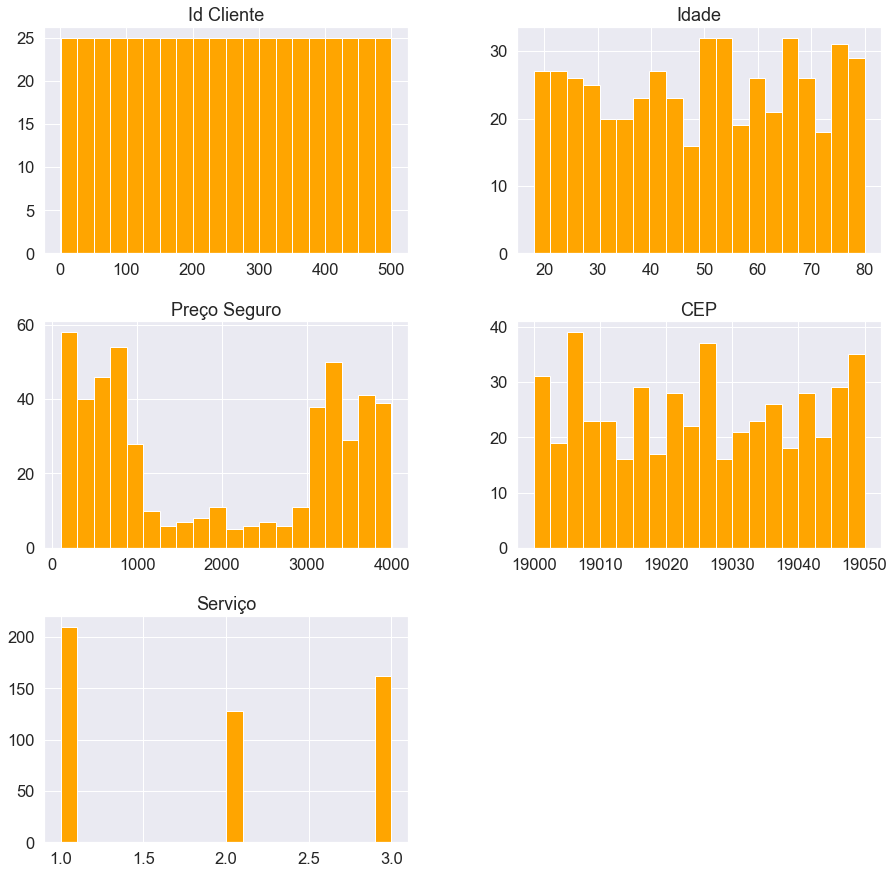

In [14]:
sns.set(font_scale=1.5, rc={'figure.figsize': (15,15)})
eixo = df.hist(bins=20, %colors = 'orange')

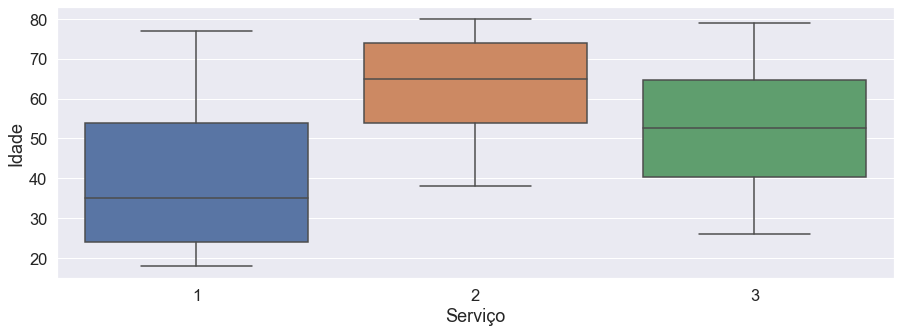

In [27]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='Serviço', y='Idade');

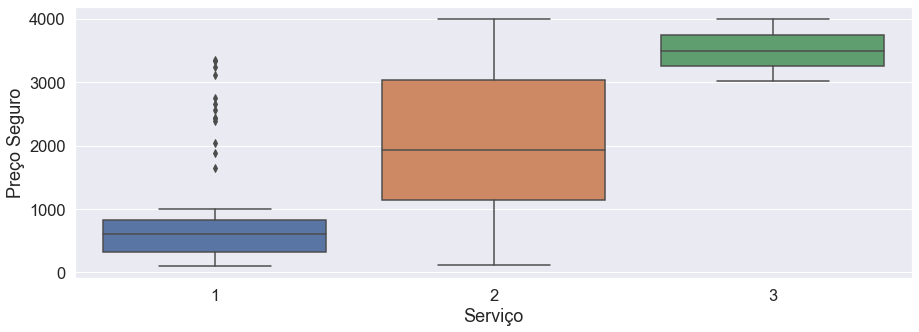

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='Serviço', y='Preço Seguro');

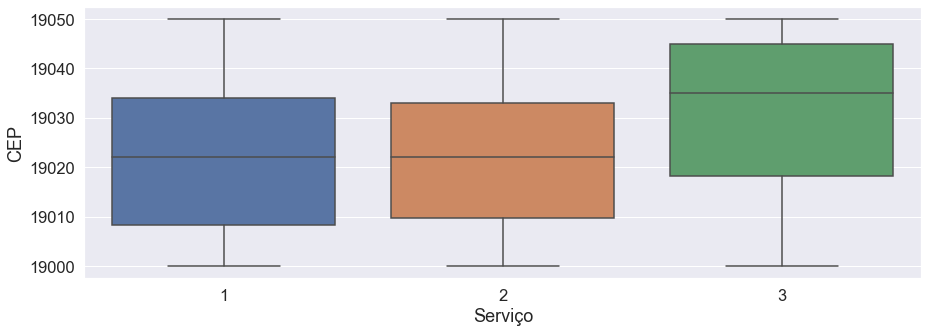

In [28]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='Serviço', y='CEP');

# DIVIDINDO OS DADOS EM TESTE E TREINO

In [43]:
caracteristica = df.iloc[:,1:4].values
previsor = df.iloc[:,4:5].values

In [51]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split (
    caracteristica,
    previsor,
    test_size=0.30,
    random_state=10
)

print(len(df))
print(len(x_treino))
print(len(x_teste))

500
350
150


# #CRIANDO O MODELO

In [56]:
from sklearn.ensemble import RandomForestClassifier

algoritmo = RandomForestClassifier(n_estimators=500);

algoritmo.fit(x_treino, y_treino);

C:\Users\leonardo\AppData\Local\Temp/ipykernel_15184/2535107829.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  algoritmo.fit(x_treino, y_treino);


# Analisando a Matriz Confusão

[[60  3  1]
 [ 6 22  8]
 [ 0  1 49]]


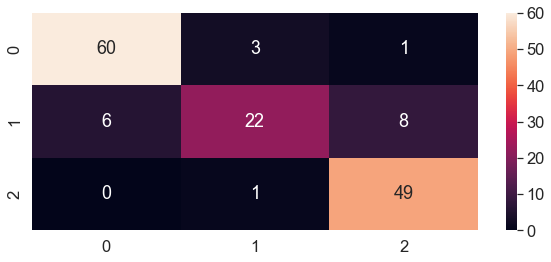

In [61]:
Previsoes = algoritmo.predict(x_teste)

from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_teste, Previsoes)
print(matriz_confusao)

plt.figure(figsize=(10,4))
sns.heatmap(matriz_confusao, annot=True);


# Analisando a acurácia do modelo

In [63]:
from sklearn.metrics import classification_report

report = classification_report(y_teste, Previsoes)

print (report)

              precision    recall  f1-score   support

           1       0.91      0.94      0.92        64
           2       0.85      0.61      0.71        36
           3       0.84      0.98      0.91        50

    accuracy                           0.87       150
   macro avg       0.87      0.84      0.85       150
weighted avg       0.87      0.87      0.87       150



# Fazendo Previsões

In [64]:
df_novas=pd.read_excel('BaseDados_FlorestaDeDecisão.xlsx', 'Plan2')

In [65]:
df_novas.head()

,Id Cliente,Idade,Preço Seguro,CEP
0,1001,25,801,19001
1,1002,27,1090,19027
2,1003,45,364,19030
3,1004,30,2428,19014
4,1005,32,891,19020


In [66]:
prever = df_novas.iloc[:, 1:4].values

df_novas['Previsão do Modelo'] = algoritmo.predict(prever)

In [68]:
df_novas

,Id Cliente,Idade,Preço Seguro,CEP,Previsão do Modelo
0,1001,25,801,19001,1
1,1002,27,1090,19027,1
2,1003,45,364,19030,1
3,1004,30,2428,19014,1
4,1005,32,891,19020,1
5,1006,36,823,19025,1
6,1007,44,3895,19032,3
7,1008,36,457,19023,1
8,1009,40,427,19008,1
9,1010,40,928,19009,1


In [70]:
df_novas['Previsão do Modelo'].value_counts()

1    15
2     5
3     1
Name: Previsão do Modelo, dtype: int64